In [34]:
# Import
import os, glob
import requests as req
import matplotlib.pyplot as plt
import numpy as np
import joblib
from google.colab import drive
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [35]:
# Set Google Drive Path
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/competition/RunSpace/model/')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [36]:
# Load GNSS Training Data
foldername = 'segment-interval-01-training'
textfiles = glob.glob(os.path.join(foldername, "*.txt"))

data_training = np.array([])
for filename in textfiles:
  data_training = np.loadtxt(filename)

print(data_training.shape)

(166049, 6)


In [37]:
# Split the Training and Test Data
X = data_training[80000:120000, 0: 3: 2]
Y = data_training[80000:120000, -2]
Xtr, Xts, Ytr, Yts = train_test_split(X, Y, train_size=0.5, random_state=None, stratify=None)
print(Xtr.shape, Ytr.shape, sep=" ")
print(Xtr[1])
print(Ytr[1])

(20000, 2) (20000,)
[169928.655565 169928.642151]
169928.648868


In [38]:
# Linear Model
reg = linear_model.LinearRegression()
reg.fit(Xtr, Ytr)

LinearRegression()

In [39]:
# Save Model
model_path_name = './GNSS_interpolation_model_dirE.h5'
joblib.dump(reg, model_path_name)

['./GNSS_interpolation_model_dirE.h5']

In [40]:
# Load Model
my_model = joblib.load(model_path_name)

In [41]:
# Compare R^2 of Traing and Testing Data
Yhat_tr = my_model.predict(Xtr)
RSS_tr = np.mean((Yhat_tr-Ytr)**2)/(np.std(Ytr)**2)
Rsq_tr = 1 - RSS_tr
print("R^2 = {0:f}".format(Rsq_tr))

Yhat_val = my_model.predict(Xts)
RSS_val = np.mean((Yhat_val-Yts)**2)/(np.std(Yts)**2)
Rsq_val = 1 - RSS_val
print("R^2 = {0:f}".format(Rsq_val))

R^2 = 1.000000
R^2 = 1.000000


In [42]:
# Load GNSS Testing Data
foldername = 'segment-interval-01-testing'
textfiles = glob.glob(os.path.join(foldername, "*.txt"))

data_testing = np.array([])
for filename in textfiles:
  data_testing = np.loadtxt(filename)

print(data_testing.shape)

(3321, 6)


true = 169719.753147
pred = 169719.753453
diff = -0.000306


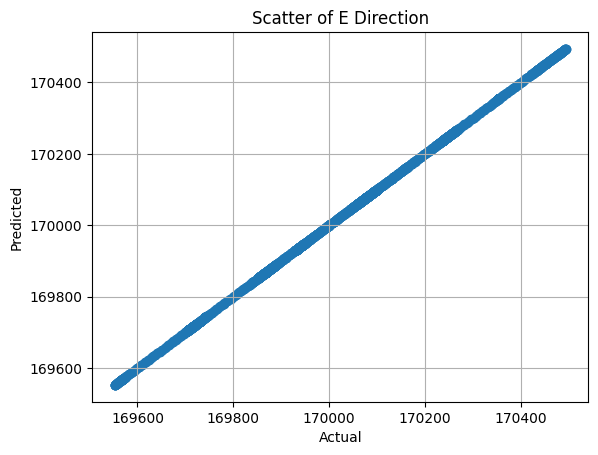

In [50]:
# Make Plot
X = data_testing[:, 0: 3: 2]
Y = data_testing[:, -2]
my_test = np.array(X)
my_pred = my_model.predict(my_test)
time = 500

print("true = {:.6f}".format(Y[time]))
print("pred = {:.6f}".format(my_pred[time]))
print("diff = {:.6f}".format((Y-my_pred)[time]))

plt.scatter(Y, my_pred)
plt.title('Scatter of E Direction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()